In [1]:
%matplotlib notebook

from numpy import *
from os import path
home = path.expanduser("~")
desktop = path.join(home, "Desktop")

import matplotlib.pyplot as plt

# define plot style
width = 0.05
plotMarkerSize = 8
labelfontsize = 15
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [6., 4.5]
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['xtick.top'] = True
mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['xtick.major.width'] = 1.0
mpl.rcParams['xtick.minor.width'] = 0.8
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['xtick.direction'] = "in"
mpl.rcParams['ytick.right'] = True
mpl.rcParams['ytick.labelsize'] = 15
mpl.rcParams['ytick.major.width'] = 1.0
mpl.rcParams['ytick.minor.width'] = 0.8
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['ytick.direction'] = "in"
mpl.rcParams['legend.fontsize'] = 15
mpl.rcParams['legend.numpoints'] = 1
mpl.rcParams['font.size'] = 15
mpl.rcParams['savefig.format'] = "pdf"

working_path = "../"

# change the following line to your result folder(s)

In [4]:
# change the following line to your result folder(s)
RunFolder1 = "Run_AuAu200_C0-10"
RunFolder2 = "Run_PbPb5020_C20-30"

# label our calculations
labels=[r"0-10% AuAu @ 200 GeV", r"20-30% PbPb @ 5.02 TeV"]

In [5]:
# load the data table(s)
data1 = loadtxt(path.join(working_path, RunFolder1,
                          "momentum_anisotropy_eta_-0.5_0.5.dat"))
data2 = loadtxt(path.join(working_path, RunFolder2,
                          "momentum_anisotropy_eta_-0.5_0.5.dat"))
ecc_data1 = loadtxt(path.join(working_path, RunFolder1,
                              "eccentricities_evo_eta_-0.5_0.5.dat"))
ecc_data2 = loadtxt(path.join(working_path, RunFolder2,
                              "eccentricities_evo_eta_-0.5_0.5.dat"))

## Averaged temperature evolution as a function of $\tau$

One interesting thermodyanmic quantity during the hydrodynamic simulations is temperature. Its evolution determines the fate of high energy partons travel through the medium.

In hydrodynamic simulations, temperature has a 3D distribution and evolves with time. To visualize the evolution of temperature, we will compute the system's averaged temperature $\langle T \rangle$ and plot it as a function of $\tau$. Here we define the averaged temperature using energy density as a weight.

<div class="math">
    \begin{equation}
        \langle T \rangle = \frac{\int d^2 x e(x, y) T(x, y)}{\int d^2 x e(x, y)}
    \end{equation}
</div>

<IPython.core.display.Javascript object>


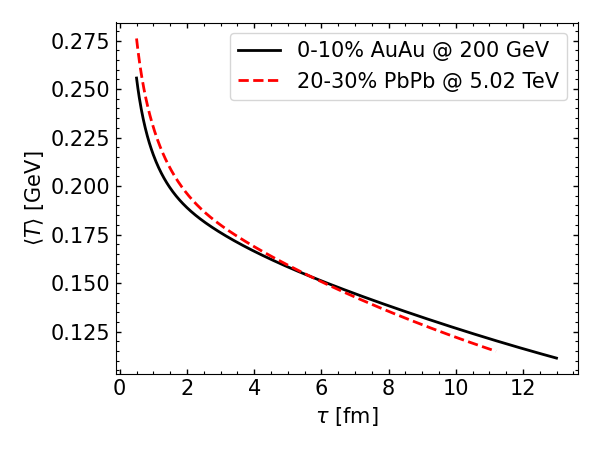

In [7]:
fig = plt.figure()

plt.plot(data1[:, 0], data1[:, -1], '-k', label=labels[0])
plt.plot(data2[:, 0], data2[:, -1], '--r', label=labels[1])

plt.legend(loc=0)
plt.xlabel(r"$\tau$ [fm]")
plt.ylabel(r"$\langle T \rangle$ [GeV]")
plt.tight_layout()

# save plot to the Desktop
#plt.savefig(path.join(desktop, 'avg_temperature_evo'))

## Averaged velocity as a function of $\tau$

The local pressure gradients accelerate fluid. At low temperature where fluid cells are converted to individual hadrons, the local fluid velocity will boost particle's momentum. During this particlization stage, the spatial distribution of the fluid velocity is directly map to the momenta of emitted particles. Therefore, the experimental measured particle momentum distribution contains information about the fluid velocity at kinetic freeze-out. 

The radial flow of hydrodynamics can boost particles to higher momenta and increases their averaged transverse momentum. Here, we would like to understand how buil viscosity affects the development of radial flow in the hydrodynamic simulations.

<IPython.core.display.Javascript object>


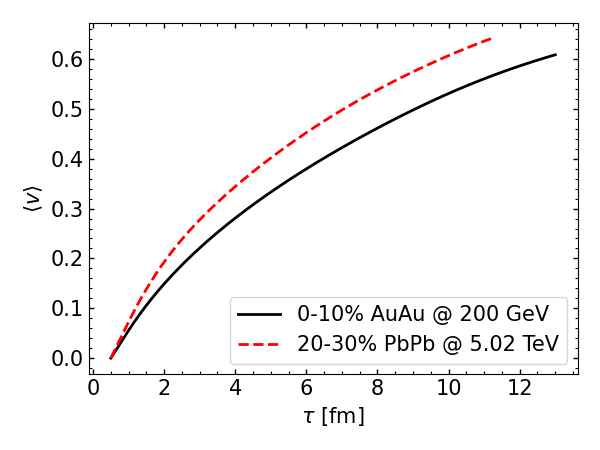

In [8]:
# compute the average transverse velocity
gamma = data1[:, -2]
v_avg1 = sqrt(1. - 1./gamma**2.)
gamma = data2[:, -2]
v_avg2 = sqrt(1. - 1./gamma**2.)

fig = plt.figure()

plt.plot(data1[:, 0], v_avg1, '-k', label=labels[0])
plt.plot(data2[:, 0], v_avg2, '--r', label=labels[1])

plt.legend(loc=0)
plt.xlabel(r"$\tau$ [fm]")
plt.ylabel(r"$\langle v \rangle$")
plt.tight_layout()

#plt.savefig(path.join(desktop, 'avg_v_evo'))

### Evolution of the spatial eccentricity

The acceleration of the fluid cell is driven by local pressure gradients. Hydrodynamics converts the spatial eccentricity of energy density profile into anistropy in fluid velocity and finally imprints to momentum of the emitted particles.

Here we would like to see how the spatial eccenticity evolution as a function of $\tau$ during the hydrodynamic simulations with different valued of viscosity.

<IPython.core.display.Javascript object>


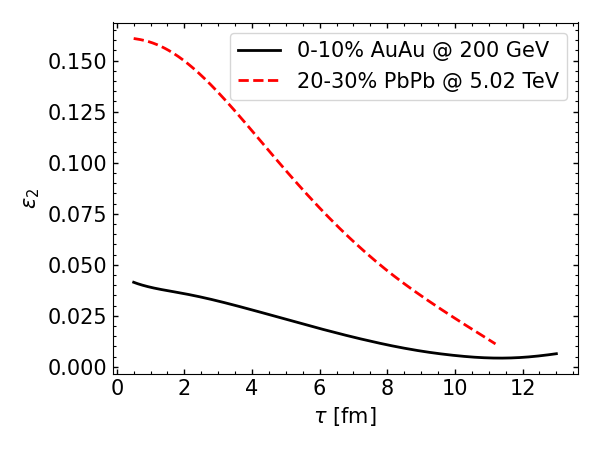

In [9]:
n = 2 # n defines which order of ecc_n we want to see

fig = plt.figure()

plt.plot(ecc_data1[:, 0], ecc_data1[:, n], '-k', label=labels[0])
plt.plot(ecc_data2[:, 0], ecc_data2[:, n], '--r', label=labels[1])

plt.legend(loc=0)
plt.xlabel(r"$\tau$ [fm]")
plt.ylabel(r"$\epsilon_{}$".format(n))
plt.tight_layout()

#plt.savefig(path.join(desktop, 'ecc_{}_evo'.format(n)))

### Averaged momentum anisotropy as a function of $\tau$

The system's momentum anisotropy is defined as
$\epsilon_p = \sqrt{\frac{\langle T^{xx} - T^{yy}\rangle^2 + 2 \langle T^{xy} \rangle^2}{\langle T^{xx} + T^{yy}\rangle^2}}$. This quantities is monotonically related to the charged hadron elliptic flow coefficient. Therefore, we can gain intuitive idea about how elliptic flow is develop during the collision by studying the evolution of momentum anistropy.

<IPython.core.display.Javascript object>


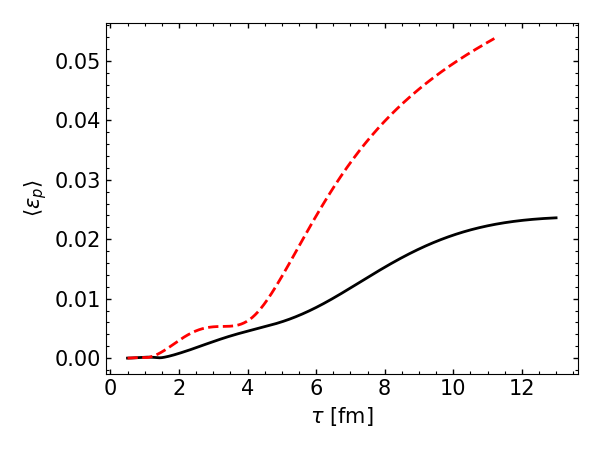

In [10]:
fig = plt.figure()

plt.plot(data1[:, 0], data1[:, 2], '-k', label=labels[0])
plt.plot(data2[:, 0], data2[:, 2], '--r', label=labels[1])

plt.xlabel(r"$\tau$ [fm]")
plt.ylabel(r"$\langle \epsilon_p \rangle$")
plt.tight_layout()

#plt.savefig(path.join(desktop, 'ecc_p_evo'))